In [28]:
%tensorflow_version 2.x

# use this to work with tensorflow 2.x on colab

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

from keras.datasets import fashion_mnist
(images_train, labels_train), (images_test,labels_test) = fashion_mnist.load_data()

In [31]:
images_test.shape

(10000, 28, 28)

In [32]:
labels_train.shape

(60000,)

In [33]:
labels_train=np.array(labels_train).reshape(-1,1)
labels_test=np.array(labels_test).reshape(-1,1)
labels_test.shape

(10000, 1)

In [34]:
onehot=OneHotEncoder()

onehot.fit(labels_train)

labels_train=onehot.transform(labels_train)
labels_test=onehot.transform(labels_test)
labels_train=labels_train.toarray()
labels_test=labels_test.toarray()

In [35]:
labels_test.shape

(10000, 10)

In [36]:
np.unique(labels_test)

array([0., 1.])

In [37]:
images_train.shape

(60000, 28, 28)

In [38]:
images_test.shape

(10000, 28, 28)

In [39]:
28*28

784

In [40]:
images_train=np.array(images_train).reshape(60000,784)/255
images_test=np.array(images_test).reshape(10000,784)/255

In [41]:
images_train=images_train.reshape(60000,  28, 28,1).astype('float32')
images_test=images_test.reshape(10000, 28, 28,1).astype('float32')

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [43]:
# Sequential API

In [44]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=( 28, 28,1), activation='relu',
                 padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),activation='relu',padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2),activation='relu',padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(200, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [45]:
# Functional API

In [46]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [47]:


image=Input(shape=(28,28,1))

conv1=Conv2D(32, (5, 5), activation='relu',padding='same')(image)
pool1=MaxPooling2D(pool_size=(2, 2))(conv1)

conv2=Conv2D(64, (5, 5),activation='relu',padding='same')(pool1)
pool2=MaxPooling2D(pool_size=(2, 2))(conv2)

flat_layer=Flatten()(pool2)

dense1=Dense(1024, activation='relu')(flat_layer)
drop1=Dropout(0.2)(dense1)

dense2=Dense(200, activation='relu')(drop1)
drop2=Dropout(0.2)(dense2)

output=Dense(10, activation='softmax')(drop2)

model=Model(inputs=image,outputs=output)

In [48]:
model.summary()

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 14, 14, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1024)                │       3,212,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 200)                 │         205,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,471,394 (13.24 MB)

 Trainable params: 3,471,394 (13.24 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
from tensorflow.keras.utils import plot_model

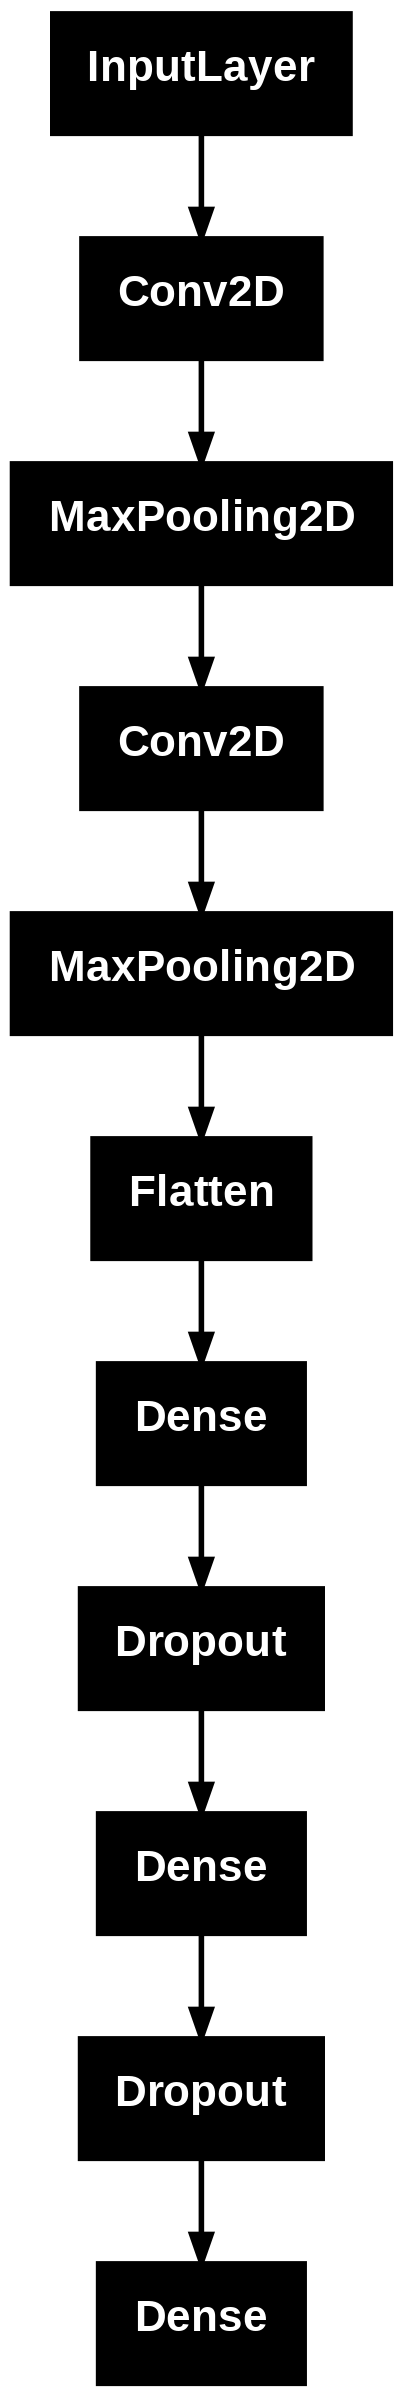

In [50]:
plot_model(model)

In [51]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [52]:
model.fit(images_train,labels_train,validation_data=[images_test,labels_test],
         epochs=10,batch_size=5000,verbose=1)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 210ms/step - accuracy: 0.3893 - loss: 1.7351 - val_accuracy: 0.7233 - val_loss: 0.8352
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 145ms/step - accuracy: 0.7065 - loss: 0.8019 - val_accuracy: 0.7706 - val_loss: 0.6064
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.7754 - loss: 0.6024 - val_accuracy: 0.8098 - val_loss: 0.5128
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.8138 - loss: 0.5144 - val_accuracy: 0.8403 - val_loss: 0.4499
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.8382 - loss: 0.4456 - val_accuracy: 0.8511 - val_loss: 0.4120
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.8515 - loss: 0.4108 - val_accuracy: 0.8576 - val_loss: 0.3921
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.8636 - loss: 0.3840 - val_accuracy: 0.8691 - val_loss: 0.3624
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - accuracy: 0.8752 - loss: 0.3460 - val_accuracy: 0.

In [53]:
# Saving the model

In [54]:
# Saving the model
from tensorflow.keras.models import model_from_json
model_json = model.to_json()

with open("model.json", "w") as json_file:
    json_file.write(model_json)


model.save_weights("model.weights.h5")

In [55]:
# loading the model

In [56]:
from tensorflow.keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [57]:
loaded_model.summary()

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 14, 14, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1024)                │       3,212,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 200)                 │         205,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,414,184 (39.73 MB)

 Trainable params: 3,471,394 (13.24 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,942,790 (26.48 MB)

In [59]:
loaded_model.load_weights("model.weights.h5")

In [60]:
# make prediction

In [61]:
p=loaded_model.predict(images_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [62]:
labels_test_predicted=np.argmax(p,1)

In [63]:
# first argument to pd.crosstab goes to rows, second to columns
# row_0 : real labels
# col_0 : predicted labels
pd.crosstab(np.argmax(labels_test,axis=1),labels_test_predicted)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,888,1,26,16,3,2,58,0,6,0
1,3,970,1,17,4,1,2,0,2,0
2,16,2,830,8,97,1,43,0,3,0
3,32,6,14,878,38,0,29,0,3,0
4,2,1,81,28,845,0,42,0,1,0
5,0,0,0,0,0,976,0,15,0,9
6,183,3,99,20,100,0,583,0,12,0
7,0,0,0,0,0,25,0,932,0,43
8,5,1,8,2,4,3,1,5,971,0


In [64]:
y_true=np.argmax(labels_test,axis=1)

In [65]:
labels_test_predicted

array([9, 2, 1, ..., 8, 1, 5])

In [66]:
(y_true==labels_test_predicted).sum()

np.int64(8841)

In [67]:
a=y_true==labels_test_predicted

In [68]:
c=[i for i,j in enumerate(a) if not j]

In [69]:
c

[12,
 17,
 23,
 25,
 29,
 40,
 42,
 43,
 45,
 49,
 57,
 66,
 67,
 68,
 89,
 117,
 135,
 147,
 150,
 153,
 172,
 217,
 227,
 239,
 241,
 244,
 255,
 286,
 313,
 316,
 320,
 324,
 325,
 332,
 342,
 359,
 361,
 381,
 382,
 396,
 406,
 441,
 444,
 454,
 457,
 460,
 474,
 490,
 526,
 529,
 531,
 541,
 548,
 565,
 572,
 578,
 581,
 585,
 586,
 587,
 595,
 607,
 628,
 633,
 634,
 635,
 639,
 670,
 685,
 686,
 688,
 689,
 697,
 711,
 722,
 725,
 726,
 732,
 753,
 760,
 787,
 800,
 801,
 805,
 851,
 860,
 887,
 890,
 902,
 909,
 921,
 926,
 930,
 938,
 956,
 960,
 963,
 965,
 968,
 971,
 976,
 977,
 979,
 994,
 1000,
 1005,
 1008,
 1025,
 1046,
 1055,
 1056,
 1058,
 1064,
 1101,
 1107,
 1111,
 1129,
 1130,
 1131,
 1139,
 1142,
 1152,
 1160,
 1162,
 1174,
 1188,
 1194,
 1197,
 1210,
 1218,
 1223,
 1231,
 1235,
 1236,
 1253,
 1254,
 1279,
 1280,
 1294,
 1297,
 1300,
 1305,
 1315,
 1326,
 1329,
 1334,
 1335,
 1336,
 1352,
 1356,
 1369,
 1374,
 1396,
 1399,
 1408,
 1425,
 1449,
 1455,
 1458,
 1462,

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

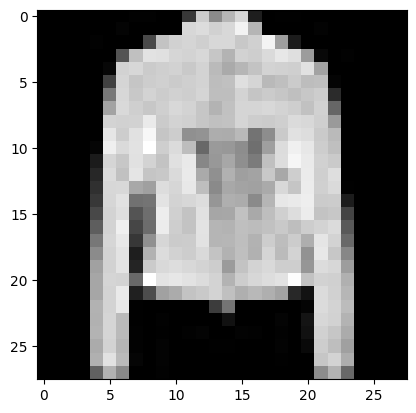

real label: 4
predicted label: 4


In [71]:
ind=7434
sample_image = images_test[ind,:,:,:]
# sample_image = np.array(sample_image, dtype='float')
pixels = sample_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
print('real label:',np.argmax(labels_test[ind]))
print('predicted label:',labels_test_predicted[ind])

In [72]:
# you can make prediction directly but if you want to further train from here
# you'll have to compile the loaded model again

In [73]:
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [74]:
loaded_model.fit(images_train,labels_train,validation_data=[images_test,labels_test],
         epochs=3,batch_size=50,verbose=1)

Epoch 1/3
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8551 - loss: 0.4042 - val_accuracy: 0.8882 - val_loss: 0.3151
Epoch 2/3
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9004 - loss: 0.2729 - val_accuracy: 0.9027 - val_loss: 0.2635
Epoch 3/3
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9152 - loss: 0.2274 - val_accuracy: 0.9087 - val_loss: 0.2517
